<a href="https://colab.research.google.com/github/shuangquan-li-con/ECON5200-37499-Applied-Data-Analytics-in-Economics/blob/main/Econ_5200_Assignment_2_Audit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
normal_traffic = np.random.randint(20,50,980)
spike_traffic = np.random.randint(1000,5000,20)
latency_logs = np.concatenate([normal_traffic,spike_traffic])

In [5]:
def calculate_mad(data):
  data = np.array(data)
  median = np.median(data)
  absolute_deviations = np.abs(data - median)
  mad = np.median(absolute_deviations)
  return mad

In [7]:
sd = np.std(latency_logs)
mad = calculate_mad(latency_logs)
mean_latency = np.mean(latency_logs)
median_latency = np.median(latency_logs)

print("Mean:",mean_latency)
print("Median",median_latency)
print("Standard Deviation:",sd)
print("MAD:",mad)

Mean: 95.393
Median 35.0
Standard Deviation: 447.1744005989162
MAD: 7.0


Standard deviation explodes because of the square. Given more observations, it explodes more heavily. Median is not affected by the number of observation therefore, it is stable.

In [8]:
def bayesian_audit(prior,sensitivity,specificity):
  p_c = prior
  p_not_c = 1 - prior
  p_flag_given_c = sensitivity
  p_flag_not_given_c = 1 - specificity
  numerator = p_flag_given_c * p_c
  denominator = numerator + p_flag_not_given_c * p_not_c
  posterior = numerator/denominator
  return posterior


In [9]:
sensitivity = 0.98
specificity = 0.98
print("Bootcamp (50% base rate):",bayesian_audit(0.5,sensitivity,specificity))
print("Econ Class (5% base rate):",bayesian_audit(0.05,sensitivity,specificity))
print("Honors Seminar (0.1% base rate):",bayesian_audit(0.001,sensitivity,specificity))

Bootcamp (50% base rate): 0.98
Econ Class (5% base rate): 0.7205882352941175
Honors Seminar (0.1% base rate): 0.04675572519083965


In [10]:
import numpy as np
observed = np.array([50250,49750])
expected = np.array([50000,50000])
chi_square = 0
for o,e in zip(observed,expected):
  chi_square +=(o - e)**2/e
print("Chi-Square Statistic:",chi_square)

Chi-Square Statistic: 2.5


since 2.5 < 3.84, the experiment is valid

Mean Market Cap (All Tokens): 17.41
Mean Market Cap (Top 1% Only): 436.34


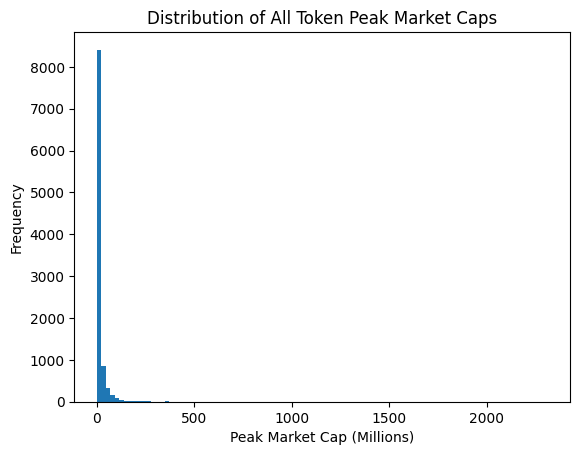

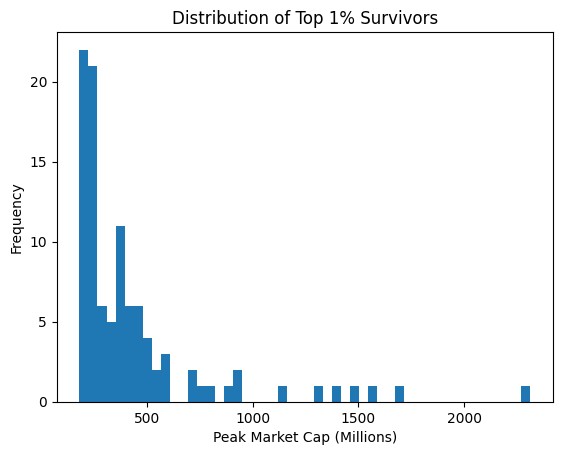

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------
# 1. Simulate Token Launches
# -------------------------

np.random.seed(42)

n_tokens = 10000

# Pareto distribution (heavy tail)
# a = shape parameter (lower -> fatter tail)
shape = 1.5

# Generate raw Pareto values
pareto_raw = np.random.pareto(shape, n_tokens)

# Scale to represent market caps (in millions)
market_caps = pareto_raw * 10

# Create full dataset (The Graveyard + Winners)
df_all = pd.DataFrame({
    "Token_ID": np.arange(n_tokens),
    "Peak_Market_Cap": market_caps
})

# -------------------------
# 2. Identify Survivors (Top 1%)
# -------------------------

threshold = np.percentile(df_all["Peak_Market_Cap"], 99)

df_survivors = df_all[df_all["Peak_Market_Cap"] >= threshold]

# -------------------------
# 3. Calculate Means
# -------------------------

mean_all = df_all["Peak_Market_Cap"].mean()
mean_survivors = df_survivors["Peak_Market_Cap"].mean()

print("Mean Market Cap (All Tokens):", round(mean_all, 2))
print("Mean Market Cap (Top 1% Only):", round(mean_survivors, 2))

# -------------------------
# 4. Visualization
# -------------------------

plt.figure()
plt.hist(df_all["Peak_Market_Cap"], bins=100)
plt.title("Distribution of All Token Peak Market Caps")
plt.xlabel("Peak Market Cap (Millions)")
plt.ylabel("Frequency")
plt.show()

plt.figure()
plt.hist(df_survivors["Peak_Market_Cap"], bins=50)
plt.title("Distribution of Top 1% Survivors")
plt.xlabel("Peak Market Cap (Millions)")
plt.ylabel("Frequency")
plt.show()